K-Nearest Neighbors  
Naive Bayes  
Decision Tree  
Random Forest  
XgBoost  
Support Vector Machine  
Neural Network  
Stacking

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv('voice.csv') # voice.csv in the same folder 
voice.head()

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = voice
# Split the data into features and target
X = data.iloc[:, :-1] # features
y = data.iloc[:, -1] # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x train, x test:", X_train.shape," ", X_test.shape)


x train, x test: (2534, 20)   (634, 20)


Preprocessing: label encoder and normalization

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


Visualization

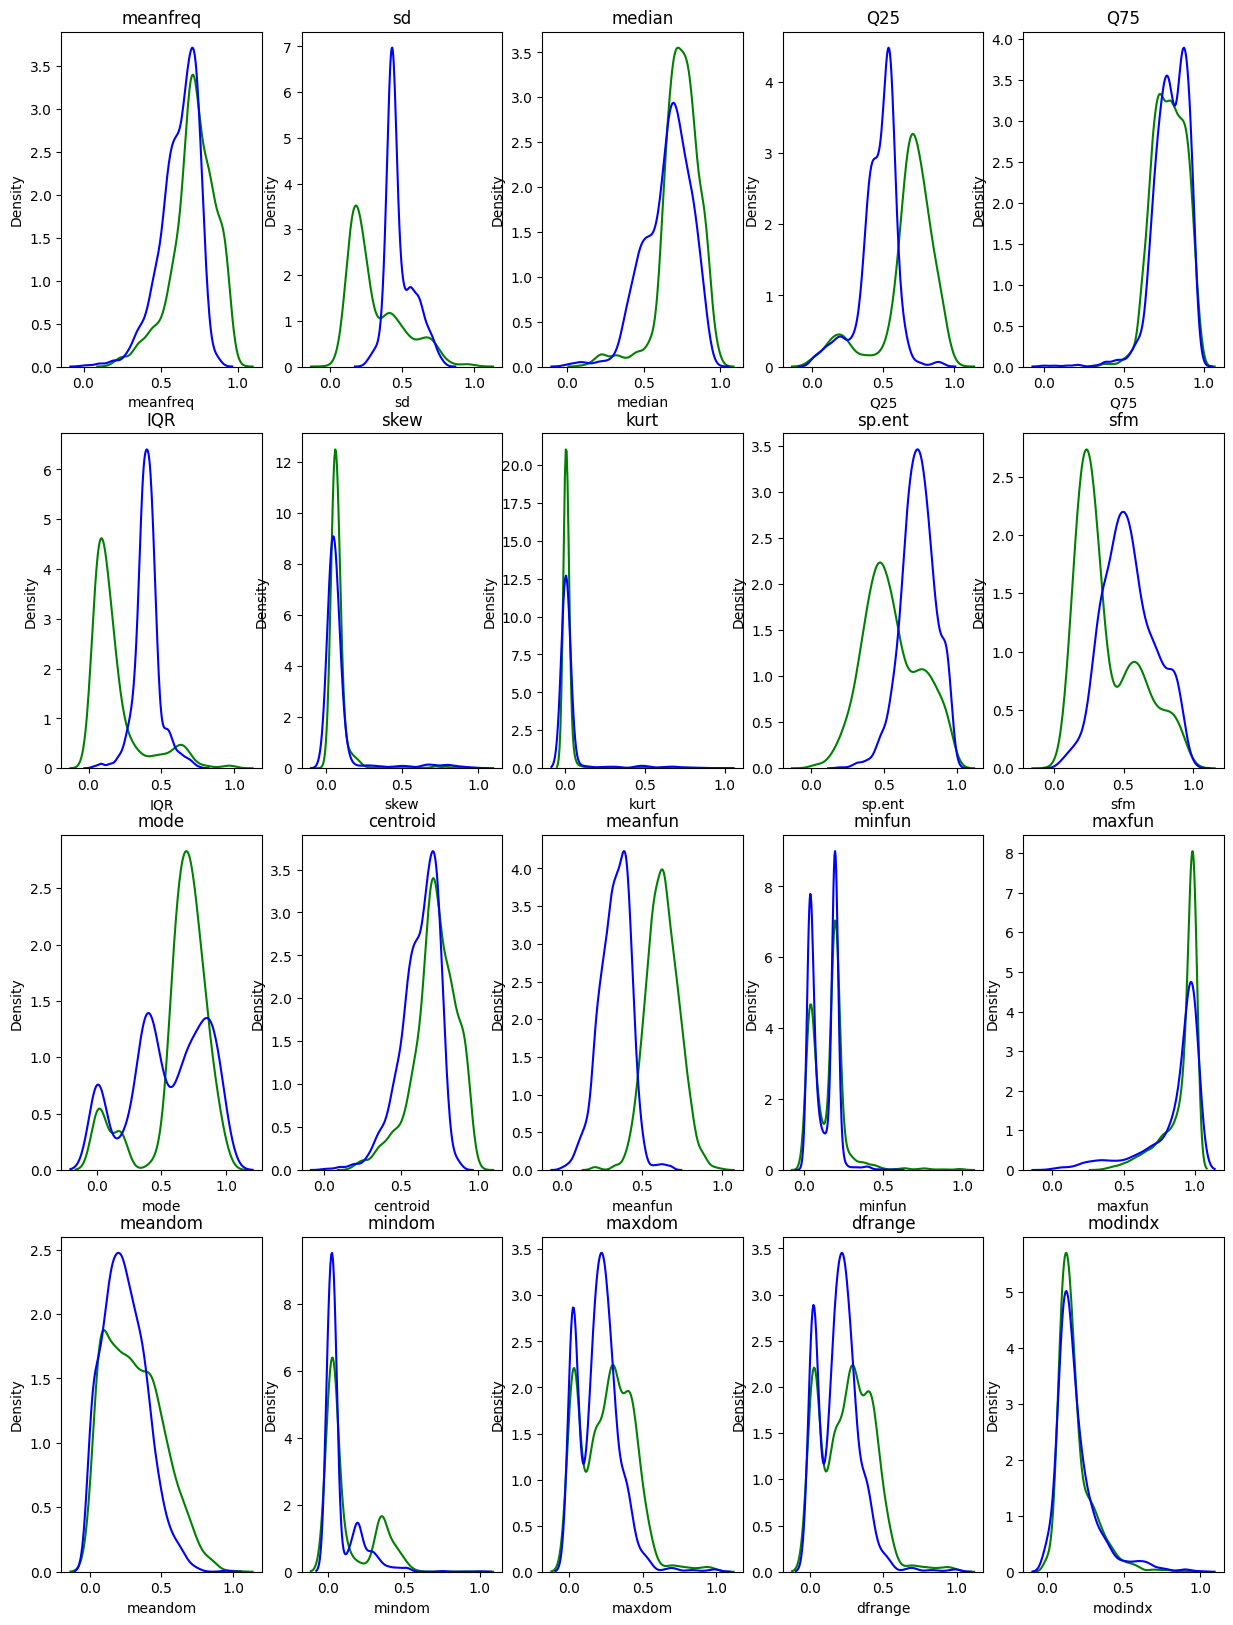

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [ ]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [ ]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

## K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [ ]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.028391167192429023 occurs at k=4.


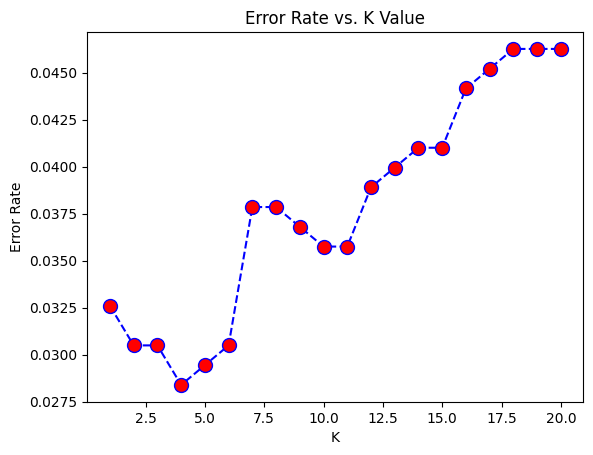

In [ ]:
# find k with the lowest error 
knn_k=knn_error(21,x_train,y_train,x_test,y_test)

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors = knn_k)
knn.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

# Training set performance
knn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

Model performance for Training set
- Accuracy: 0.98872350022553
- MCC: 0.977466696088891
- F1 score: 0.988723468105842
----------------------------------
Model performance for Test set
- Accuracy: 0.9716088328075709
- MCC: 0.9432367524503784
- F1 score: 0.9716090211618038


## Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [ ]:
bayes=naive_bayes.GaussianNB()

In [ ]:
bayes.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = bayes.predict(x_train)
y_test_pred = bayes.predict(x_test)

# Training set performance
bayes_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
bayes_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
bayes_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
bayes_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
bayes_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
bayes_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % bayes_train_accuracy)
print('- MCC: %s' % bayes_train_mcc)
print('- F1 score: %s' % bayes_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % bayes_test_accuracy)
print('- MCC: %s' % bayes_test_mcc)
print('- F1 score: %s' % bayes_test_f1)


Model performance for Training set
- Accuracy: 0.8903924221921515
- MCC: 0.7807836010710442
- F1 score: 0.8903922883898372
----------------------------------
Model performance for Test set
- Accuracy: 0.8948475289169295
- MCC: 0.7901737721011193
- F1 score: 0.8948270630933897


## Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [ ]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model_dt = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model_dt.fit(x_train, y_train)
        y_pred = model_dt.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.033648790746582544 occurs at n=8.


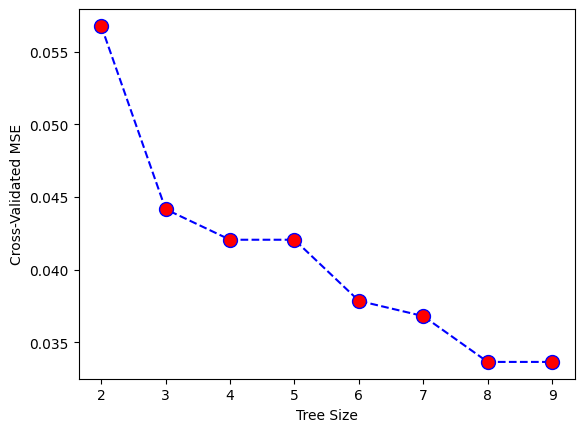

In [ ]:
dt_n=dt_error(10,x_train,y_train,x_test,y_test)

In [ ]:
#prune tree
dt = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = dt_n)

In [ ]:
dt.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

# Training set performance
dt_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
dt_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
dt_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % dt_train_accuracy)
print('- MCC: %s' % dt_train_mcc)
print('- F1 score: %s' % dt_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)

Model performance for Training set
- Accuracy: 0.9778980604420388
- MCC: 0.9557991266404878
- F1 score: 0.9778979525185695
----------------------------------
Model performance for Test set
- Accuracy: 0.9663512092534174
- MCC: 0.9327703683815864
- F1 score: 0.9663487533545928


## Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [ ]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model_rf = ensemble.RandomForestClassifier(n_estimators = i)
        model_rf.fit(x_train, y_train)
        y_pred = model_rf.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.023133543638275498 occurs at n=61.


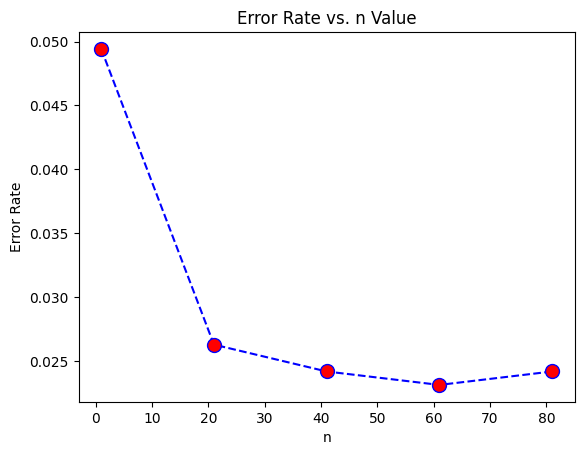

In [ ]:
rf_e=rf_error(100,x_train,y_train,x_test,y_test)

In [ ]:
rf=ensemble.RandomForestClassifier(n_estimators = rf_e)

In [ ]:
rf.fit(x_train, y_train) # Train model

# Make predictions
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Training set performance
rf_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
rf_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % rf_train_accuracy)
print('- MCC: %s' % rf_train_mcc)
print('- F1 score: %s' % rf_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1 score: %s' % rf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
----------------------------------
Model performance for Test set
- Accuracy: 0.9779179810725552
- MCC: 0.955837343466736
- F1 score: 0.9779180787390088


## Support Vector Machine
Using svm.SVC() to build the model.

In [ ]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model_svm=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model_svm.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model_svm.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [ ]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model_svm=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model_svm.fit(x_train, y_train)
        y_pred = model_svm.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [ ]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9792512404149752
rbf  out-of-sample accuracy in SVM:  0.9758149316508938
poly  in-sample accuracy in SVM:  0.9824086603518268
poly  out-of-sample accuracy in SVM:  0.9800210304942166
linear  in-sample accuracy in SVM:  0.97744700045106
linear  out-of-sample accuracy in SVM:  0.9684542586750788
Highest accuracy is 0.9800210304942166 occurs at poly kernel.


Lowest error is 0.019978969505783387 occurs at C=1.


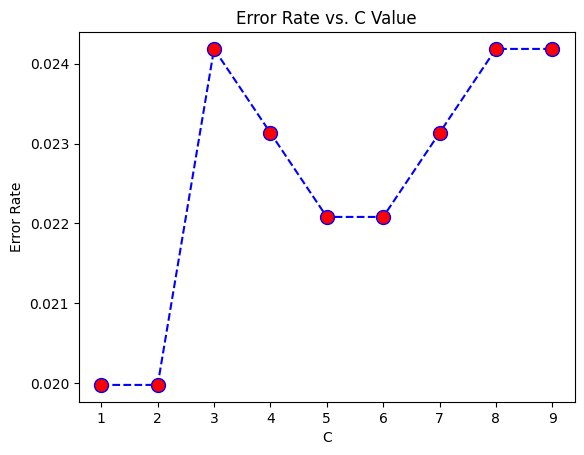

In [ ]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [ ]:
svm=svm.SVC(kernel=k,C=c)

In [ ]:
svm.fit(x_train, y_train)

# Make predictions
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

# Training set performance
svm_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
svm_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
svm_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
svm_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
svm_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
svm_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % svm_train_accuracy)
print('- MCC: %s' % svm_train_mcc)
print('- F1 score: %s' % svm_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % svm_test_accuracy)
print('- MCC: %s' % svm_test_mcc)
print('- F1 score: %s' % svm_test_f1)

Model performance for Training set
- Accuracy: 0.9801533603969328
- MCC: 0.960306325075686
- F1 score: 0.9801533603969328
----------------------------------
Model performance for Test set
- Accuracy: 0.9768664563617245
- MCC: 0.9537402752527916
- F1 score: 0.9768667121573631


## Neural Network
Using neural_network.MLPClassifier to build the model.

In [ ]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model_nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model_nn.fit(x_train, y_train)
        y_pred = model_nn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.033648790746582544 occurs at C=7.


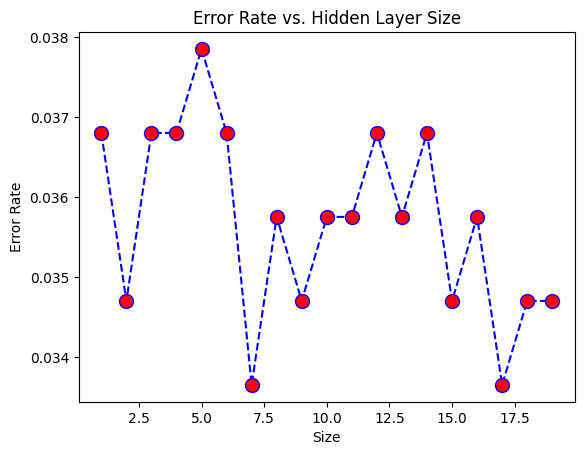

In [ ]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [ ]:
nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)

In [ ]:
nn.fit(x_train, y_train)

# Make predictions
y_train_pred = nn.predict(x_train)
y_test_pred = nn.predict(x_test)

# Training set performance
nn_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
nn_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
nn_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set performance
nn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
nn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
nn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % nn_train_accuracy)
print('- MCC: %s' % nn_train_mcc)
print('- F1 score: %s' % nn_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % nn_test_accuracy)
print('- MCC: %s' % nn_test_mcc)
print('- F1 score: %s' % nn_test_f1)

Model performance for Training set
- Accuracy: 0.9756427604871448
- MCC: 0.9512906739983273
- F1 score: 0.9756425424351579
----------------------------------
Model performance for Test set
- Accuracy: 0.9663512092534174
- MCC: 0.9327091066577323
- F1 score: 0.9663515813198007


# Stacking

In [ ]:
# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimator_list = [
    ('knn',knn),
    ('bayes',bayes),
    ('dt',dt),
    ('rf',rf),
    ('svm',svm),
    ('nn',nn) ]


# Build stack model 
# final_estimator = LogisticRegression(), LinearRegression()
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)


Model performance for Training set
- Accuracy: 0.9945872801082544
- MCC: 0.9891891276052605
- F1 score: 0.994587286715729
----------------------------------
Model performance for Test set
- Accuracy: 0.9863301787592008
- MCC: 0.9726769693153547
- F1 score: 0.986329725265688


In [ ]:
# ####Gradient boosting classifier####
# # Define estimators
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier

# estimator_list = [
#     ('knn',knn),
#     ('bayes',bayes),
#     ('dt',dt),
#     ('rf',rf),
#     ('svm',svm),
#     ('nn',nn) ]


# # Build stack model
# stack_model = StackingClassifier(
#     estimators=estimator_list, final_estimator=LinearRegression()
# )

# # Train stacked model
# stack_model.fit(x_train, y_train)

# # Make predictions
# y_train_pred = stack_model.predict(x_train)
# y_test_pred = stack_model.predict(x_test)

# # Training set model performance
# stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
# stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
# stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# # Test set model performance
# stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
# stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
# stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

# print('Model performance for Training set')
# print('- Accuracy: %s' % stack_model_train_accuracy)
# print('- MCC: %s' % stack_model_train_mcc)
# print('- F1 score: %s' % stack_model_train_f1)
# print('----------------------------------')
# print('Model performance for Test set')
# print('- Accuracy: %s' % stack_model_test_accuracy)
# print('- MCC: %s' % stack_model_test_mcc)
# print('- F1 score: %s' % stack_model_test_f1)

In [ ]:
# #Support Vector Machine
# # Define estimators
# from sklearn.svm import SVC
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# estimator_list = [
#     ('knn',knn),
#     ('bayes',bayes),
#     ('dt',dt),
#     ('rf',rf),
#     ('svm',svm),
#     ('nn',nn) ]


# # Build stack model
# stack_model = StackingClassifier(
#     estimators=estimator_list, final_estimator=SVC()
# )

# # Train stacked model
# stack_model.fit(x_train, y_train)

# # Make predictions
# y_train_pred = stack_model.predict(x_train)
# y_test_pred = stack_model.predict(x_test)

# # Training set model performance
# stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
# stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
# stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# # Test set model performance
# stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
# stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
# stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

# print('Model performance for Training set')
# print('- Accuracy: %s' % stack_model_train_accuracy)
# print('- MCC: %s' % stack_model_train_mcc)
# print('- F1 score: %s' % stack_model_train_f1)
# print('----------------------------------')
# print('Model performance for Test set')
# print('- Accuracy: %s' % stack_model_test_accuracy)
# print('- MCC: %s' % stack_model_test_mcc)
# print('- F1 score: %s' % stack_model_test_f1)

In [ ]:
# #K-Neighbors classifier
# # Define estimators
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# estimator_list = [
#     ('knn',knn),
#     ('bayes',bayes),
#     ('dt',dt),
#     ('rf',rf),
#     ('svm',svm),
#     ('nn',nn) ]


# # Build stack model
# stack_model = StackingClassifier(
#     estimators=estimator_list, final_estimator=KNeighborsClassifier()
# )

# # Train stacked model
# stack_model.fit(x_train, y_train)

# # Make predictions
# y_train_pred = stack_model.predict(x_train)
# y_test_pred = stack_model.predict(x_test)

# # Training set model performance
# stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
# stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
# stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# # Test set model performance
# stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
# stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
# stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

# print('Model performance for Training set')
# print('- Accuracy: %s' % stack_model_train_accuracy)
# print('- MCC: %s' % stack_model_train_mcc)
# print('- F1 score: %s' % stack_model_train_f1)
# print('----------------------------------')
# print('Model performance for Test set')
# print('- Accuracy: %s' % stack_model_test_accuracy)
# print('- MCC: %s' % stack_model_test_mcc)
# print('- F1 score: %s' % stack_model_test_f1)

In [ ]:
# acc_train_list = {'knn':knn_train_accuracy,
# 'bayes': bayes_train_accuracy,
# 'dt': dt_train_accuracy,
# 'rf': rf_train_accuracy,
# 'svm': svm_train_accuracy,
# 'nn': nn_train_accuracy,
# 'stack': stack_model_train_accuracy}

# mcc_train_list = {'knn':knn_train_mcc,
# 'bayes': bayes_train_mcc,
# 'dt': dt_train_mcc,
# 'rf': rf_train_mcc,
# 'svm': svm_train_mcc,
# 'nn': nn_train_mcc,
# 'stack': stack_model_train_mcc}

# f1_train_list = {'knn':knn_train_f1,
# 'bayes': bayes_train_f1,
# 'dt': dt_train_f1,
# 'rf': rf_train_f1,
# 'svm': svm_train_f1,
# 'nn': nn_train_f1,
# 'stack': stack_model_train_f1}

In [ ]:
# mcc_train_list

In [ ]:
# import pandas as pd

# acc_df = pd.DataFrame.from_dict(acc_train_list, orient='index', columns=['Accuracy'])
# mcc_df = pd.DataFrame.from_dict(mcc_train_list, orient='index', columns=['MCC'])
# f1_df = pd.DataFrame.from_dict(f1_train_list, orient='index', columns=['F1'])
# df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
# df
